In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import seaborn
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud

In [2]:
with open("C:\\Users\\lavi\\Desktop\\DL\\Text Mining\\Goldens.txt",'r') as f:
    text = f.readlines()
    text = [line.strip() for line in text]

In [3]:
print(text)

['Goldens are outgoing, trustworthy, and eager-to-please family dogs, and relatively easy to train. They take a joyous and playful approach to life and maintain this puppyish behavior into adulthood. These energetic, powerful gundogs enjoy outdoor play.', 'People like to have them as pets because they are very friendly. People also like them because their face looks like they are smiling all the time. Goldens are well known for their calm and easy-going temperament. They are great family dogs and provide good companionship. Goldens make wonderful pets. Goldens are reliable, outgoing, intelligent, energetic, playful, and loving, especially when socialized well from a young age.', 'These include light golden, golden, dark golden. They are very good at smelling things, so they are also good for hunting. The second part of their name, retriever, is very true because they love to fetch things for their people! Goldens love to catch tennis balls and frisbees.']


In [4]:
text_pasted = ' '.join(text)
text_pasted

'Goldens are outgoing, trustworthy, and eager-to-please family dogs, and relatively easy to train. They take a joyous and playful approach to life and maintain this puppyish behavior into adulthood. These energetic, powerful gundogs enjoy outdoor play. People like to have them as pets because they are very friendly. People also like them because their face looks like they are smiling all the time. Goldens are well known for their calm and easy-going temperament. They are great family dogs and provide good companionship. Goldens make wonderful pets. Goldens are reliable, outgoing, intelligent, energetic, playful, and loving, especially when socialized well from a young age. These include light golden, golden, dark golden. They are very good at smelling things, so they are also good for hunting. The second part of their name, retriever, is very true because they love to fetch things for their people! Goldens love to catch tennis balls and frisbees.'

In [5]:
clean_data1 = text_pasted.lower()
clean_data1 

'goldens are outgoing, trustworthy, and eager-to-please family dogs, and relatively easy to train. they take a joyous and playful approach to life and maintain this puppyish behavior into adulthood. these energetic, powerful gundogs enjoy outdoor play. people like to have them as pets because they are very friendly. people also like them because their face looks like they are smiling all the time. goldens are well known for their calm and easy-going temperament. they are great family dogs and provide good companionship. goldens make wonderful pets. goldens are reliable, outgoing, intelligent, energetic, playful, and loving, especially when socialized well from a young age. these include light golden, golden, dark golden. they are very good at smelling things, so they are also good for hunting. the second part of their name, retriever, is very true because they love to fetch things for their people! goldens love to catch tennis balls and frisbees.'

In [6]:
clean_data2 = re.sub(r'[^\w\s]','',clean_data1)
clean_data2 

'goldens are outgoing trustworthy and eagertoplease family dogs and relatively easy to train they take a joyous and playful approach to life and maintain this puppyish behavior into adulthood these energetic powerful gundogs enjoy outdoor play people like to have them as pets because they are very friendly people also like them because their face looks like they are smiling all the time goldens are well known for their calm and easygoing temperament they are great family dogs and provide good companionship goldens make wonderful pets goldens are reliable outgoing intelligent energetic playful and loving especially when socialized well from a young age these include light golden golden dark golden they are very good at smelling things so they are also good for hunting the second part of their name retriever is very true because they love to fetch things for their people goldens love to catch tennis balls and frisbees'

In [7]:
clean_data3 = re.sub(r'\d+',' ',clean_data2)
clean_data3

'goldens are outgoing trustworthy and eagertoplease family dogs and relatively easy to train they take a joyous and playful approach to life and maintain this puppyish behavior into adulthood these energetic powerful gundogs enjoy outdoor play people like to have them as pets because they are very friendly people also like them because their face looks like they are smiling all the time goldens are well known for their calm and easygoing temperament they are great family dogs and provide good companionship goldens make wonderful pets goldens are reliable outgoing intelligent energetic playful and loving especially when socialized well from a young age these include light golden golden dark golden they are very good at smelling things so they are also good for hunting the second part of their name retriever is very true because they love to fetch things for their people goldens love to catch tennis balls and frisbees'

In [8]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
from nltk.tokenize import word_tokenize
import nltk

In [10]:
tokens = word_tokenize(clean_data3)

In [11]:
clean_data4 = [i for i in tokens if not i in stop_words]
clean_data4

['goldens',
 'outgoing',
 'trustworthy',
 'eagertoplease',
 'family',
 'dogs',
 'relatively',
 'easy',
 'train',
 'take',
 'joyous',
 'playful',
 'approach',
 'life',
 'maintain',
 'puppyish',
 'behavior',
 'adulthood',
 'energetic',
 'powerful',
 'gundogs',
 'enjoy',
 'outdoor',
 'play',
 'people',
 'like',
 'pets',
 'friendly',
 'people',
 'also',
 'like',
 'face',
 'looks',
 'like',
 'smiling',
 'time',
 'goldens',
 'well',
 'known',
 'calm',
 'easygoing',
 'temperament',
 'great',
 'family',
 'dogs',
 'provide',
 'good',
 'companionship',
 'goldens',
 'make',
 'wonderful',
 'pets',
 'goldens',
 'reliable',
 'outgoing',
 'intelligent',
 'energetic',
 'playful',
 'loving',
 'especially',
 'socialized',
 'well',
 'young',
 'age',
 'include',
 'light',
 'golden',
 'golden',
 'dark',
 'golden',
 'good',
 'smelling',
 'things',
 'also',
 'good',
 'hunting',
 'second',
 'part',
 'name',
 'retriever',
 'true',
 'love',
 'fetch',
 'things',
 'people',
 'goldens',
 'love',
 'catch',
 'tennis

In [12]:
clean_data4 = [i for i in tokens if not i in stop_words]

In [13]:
clean_data4

['goldens',
 'outgoing',
 'trustworthy',
 'eagertoplease',
 'family',
 'dogs',
 'relatively',
 'easy',
 'train',
 'take',
 'joyous',
 'playful',
 'approach',
 'life',
 'maintain',
 'puppyish',
 'behavior',
 'adulthood',
 'energetic',
 'powerful',
 'gundogs',
 'enjoy',
 'outdoor',
 'play',
 'people',
 'like',
 'pets',
 'friendly',
 'people',
 'also',
 'like',
 'face',
 'looks',
 'like',
 'smiling',
 'time',
 'goldens',
 'well',
 'known',
 'calm',
 'easygoing',
 'temperament',
 'great',
 'family',
 'dogs',
 'provide',
 'good',
 'companionship',
 'goldens',
 'make',
 'wonderful',
 'pets',
 'goldens',
 'reliable',
 'outgoing',
 'intelligent',
 'energetic',
 'playful',
 'loving',
 'especially',
 'socialized',
 'well',
 'young',
 'age',
 'include',
 'light',
 'golden',
 'golden',
 'dark',
 'golden',
 'good',
 'smelling',
 'things',
 'also',
 'good',
 'hunting',
 'second',
 'part',
 'name',
 'retriever',
 'true',
 'love',
 'fetch',
 'things',
 'people',
 'goldens',
 'love',
 'catch',
 'tennis

In [14]:
clean_data4 = " ".join(str(x) for x in clean_data4)
clean_data4 

'goldens outgoing trustworthy eagertoplease family dogs relatively easy train take joyous playful approach life maintain puppyish behavior adulthood energetic powerful gundogs enjoy outdoor play people like pets friendly people also like face looks like smiling time goldens well known calm easygoing temperament great family dogs provide good companionship goldens make wonderful pets goldens reliable outgoing intelligent energetic playful loving especially socialized well young age include light golden golden dark golden good smelling things also good hunting second part name retriever true love fetch things people goldens love catch tennis balls frisbees'

In [15]:
clean_data5 = ' '.join(i for i in clean_data4.split() if not (i.isalpha() and len(i)==1))

In [16]:
clean_data5 

'goldens outgoing trustworthy eagertoplease family dogs relatively easy train take joyous playful approach life maintain puppyish behavior adulthood energetic powerful gundogs enjoy outdoor play people like pets friendly people also like face looks like smiling time goldens well known calm easygoing temperament great family dogs provide good companionship goldens make wonderful pets goldens reliable outgoing intelligent energetic playful loving especially socialized well young age include light golden golden dark golden good smelling things also good hunting second part name retriever true love fetch things people goldens love catch tennis balls frisbees'

In [17]:
clean_data6 = clean_data5.strip()

In [18]:
clean_data6 

'goldens outgoing trustworthy eagertoplease family dogs relatively easy train take joyous playful approach life maintain puppyish behavior adulthood energetic powerful gundogs enjoy outdoor play people like pets friendly people also like face looks like smiling time goldens well known calm easygoing temperament great family dogs provide good companionship goldens make wonderful pets goldens reliable outgoing intelligent energetic playful loving especially socialized well young age include light golden golden dark golden good smelling things also good hunting second part name retriever true love fetch things people goldens love catch tennis balls frisbees'

In [19]:
words_dict = {}

In [20]:
for word in clean_data6.split():
    words_dict[word] = words_dict.get(word, 0)+1
for key in sorted(words_dict):
    print("{}:{}".format(key,words_dict[key]))

adulthood:1
age:1
also:2
approach:1
balls:1
behavior:1
calm:1
catch:1
companionship:1
dark:1
dogs:2
eagertoplease:1
easy:1
easygoing:1
energetic:2
enjoy:1
especially:1
face:1
family:2
fetch:1
friendly:1
frisbees:1
golden:3
goldens:5
good:3
great:1
gundogs:1
hunting:1
include:1
intelligent:1
joyous:1
known:1
life:1
light:1
like:3
looks:1
love:2
loving:1
maintain:1
make:1
name:1
outdoor:1
outgoing:2
part:1
people:3
pets:2
play:1
playful:2
powerful:1
provide:1
puppyish:1
relatively:1
reliable:1
retriever:1
second:1
smelling:1
smiling:1
socialized:1
take:1
temperament:1
tennis:1
things:2
time:1
train:1
true:1
trustworthy:1
well:2
wonderful:1
young:1


In [21]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(clean_data6)

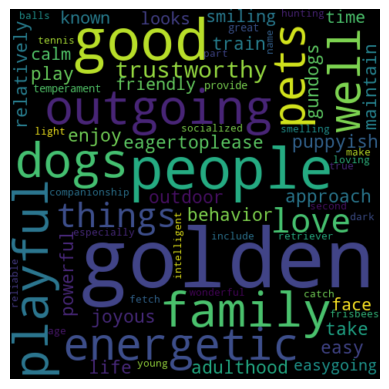

In [22]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lavi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
analyser = SentimentIntensityAnalyzer()

In [26]:
scores = analyser.polarity_scores(clean_data6)

In [27]:
for key in sorted(scores):
    print('{0}: {1},'.format(key, scores[key]), end='')

compound: 0.998,neg: 0.0,neu: 0.394,pos: 0.606,

In [28]:
from matplotlib.colors import ListedColormap

In [29]:
wc = WordCloud(mode='RGBA',
               background_color='rgba(255, 255, 255, 0)', colormap='RdGy')
wc.generate(clean_data6)

In [30]:
from PIL import Image
image = Image.fromarray(wc.to_array())
background = Image.open('C:\\Users\\lavi\\Desktop\\G\\golden1.png')
background = background.resize(image.size)
new_image = Image.alpha_composite(background, image)

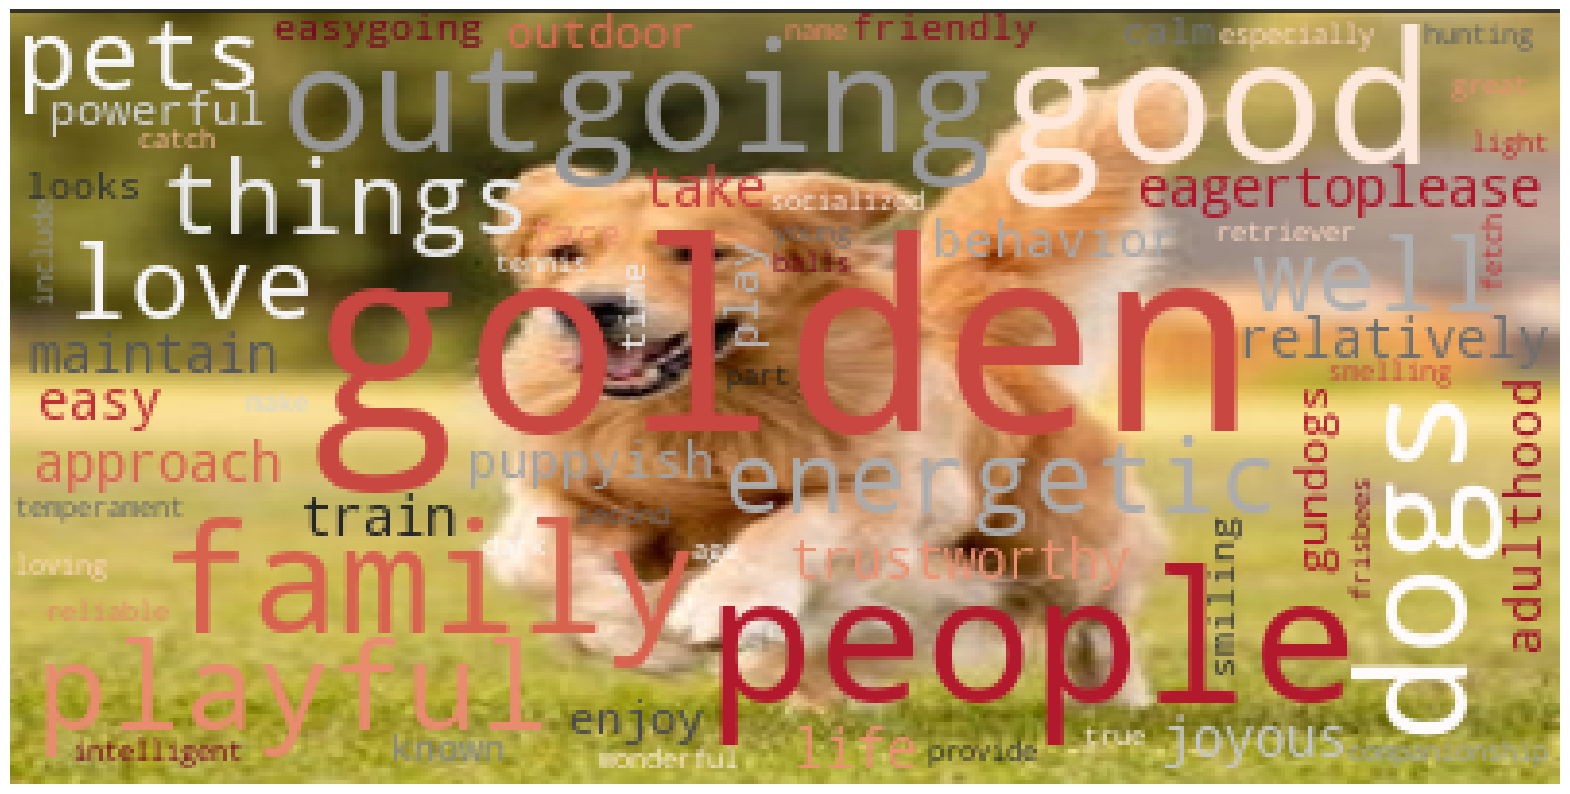

In [31]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(new_image)
plt.show()

In [32]:
text = " ".join(text)

In [33]:
mask = np.array(Image.open('C:\\Users\\lavi\\Desktop\\G\\darkpic1.png'))

In [34]:
golden = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='purple',
    colormap='Pastel1',
    collocations=False,
    stopwords=STOPWORDS,
    mask=mask).generate(text)

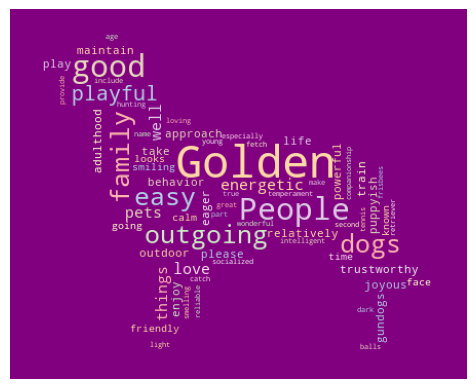

In [35]:
plt.imshow(golden)
plt.axis("off")
plt.show()